# Chapter 12. Linear Regression (회귀분석)
Wikipedia(https://en.wikipedia.org/wiki/Linear_regression): a **Linear regression** is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or *independent variables*). The case of one explanatory variable is called **simple linear regression**. For more than one explanatory variable, the process is called **multiple linear regression**. This term is distinct from **multivariate linear regression**, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/adb31f58da0d8a129f978dcea8512426a8c407e1)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/220px-Linear_least_squares_example2.png)

회귀분석(https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80): 통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.[참고 1]

선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 알려지지 않은 파라미터는 데이터로부터 추정한다. 이렇게 만들어진 회귀식을 선형 모델이라고 한다.

선형 회귀는 깊이있게 연구되고 널리 사용된 첫 번째 회귀분석 기법이다.[3] 이는 알려지지 않은 파라미터에 대해 선형 관계를 갖는 모델을 세우는 것이, 비선형 관계를 갖는 모델을 세우는 것보다 용이하기 때문이다.

선형 회귀는 여러 사용 사례가 있지만, 대개 아래와 같은 두 가지 분류 중 하나로 요약할 수 있다.

값을 예측하는 것이 목적일 경우, 선형 회귀를 사용해 데이터에 적합한 예측 모형을 개발한다. 개발한 선형 회귀식을 사용해 y가 없는 x값에 대해 y를 예측하기 위해 사용할 수 있다.
종속 변수 y와 이것과 연관된 독립 변수 X1, ..., Xp가 존재하는 경우에, 선형 회귀 분석을 사용해 Xj와 y의 관계를 정량화할 수 있다. Xj는 y와 전혀 관계가 없을 수도 있고, 추가적인 정보를 제공하는 변수일 수도 있다.
일반적으로 최소제곱법(least square method)을 사용해 선형 회귀 모델을 세운다. 최소제곱법 외에 다른 기법으로도 선형 회귀 모델을 세울 수 있다. 손실 함수(loss fuction)를 최소화 하는 방식으로 선형 회귀 모델을 세울 수도 있다. 최소제곱법은 선형 회귀 모델 뿐 아니라, 비선형 회귀 모델에도 적용할 수 있다. 최소제곱법과 선형 회귀는 가깝게 연관되어 있지만, 그렇다고 해서 동의어는 아니다.

#### 용어의 정리
1. 독립변수: 예측에 사용하고자 하는 변수, 즉 영향을 미칠 것으로 생각하는 변수를 말한다. 예를 들어 키가 몸무게에 영향을 미칠 것이라고 생각한다면 키가 독립변수이다.
2. 종속변수: 예측하고자 하는 변수, 즉 영향을 받는다고 생각하는 변수를 말한다. 키가 몸무게에 영향을 미친다고 생각한다면 몸무게가 종속변수이다.
3. 설명력 (R square): 정확히는 모든 데이터에 대해, 편차(실제값과 평균과의 차이)의 제곱합에 대한 잔차(실제값과 예측값과의 차이)의 제곱합의 비중을 1에서 뺀 값. 쉽게 말하면 독립변수가 종속변수를 얼마나 설명해주는가에 대한 지수. 이 값이 1이면 독립변수가 종속변수를 100% 설명하고, 0이면 하나도 설명하지 못한다고 할 수 있다. 즉 0이면 서로 아무런 연관성이 없기 때문에 예측이 불가능하고 1이면 100% 정확하게 예측이 가능하다는 것을 의미한다.

### 1. scikit learn에서 제공하는 보스톤 데이터 로드 및 train/test 분리
1. sklearn.datasets에서 boston 데이터를 읽어온다.
2. train_test_split을 이용하여 train set과 test set으로 분리한다.
3. 분리된 data set의 크기를 확인한다.

In [1]:
import numpy as np
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

### 2. 데이터에 대한 정보를 얻기 위해 그래프 그리기
boston data set에서 X에 해당하는 각각의 값과 y의 값으로 그래프를 그려서 각 x값과 y의 관계를 직관적으로 살펴본다.

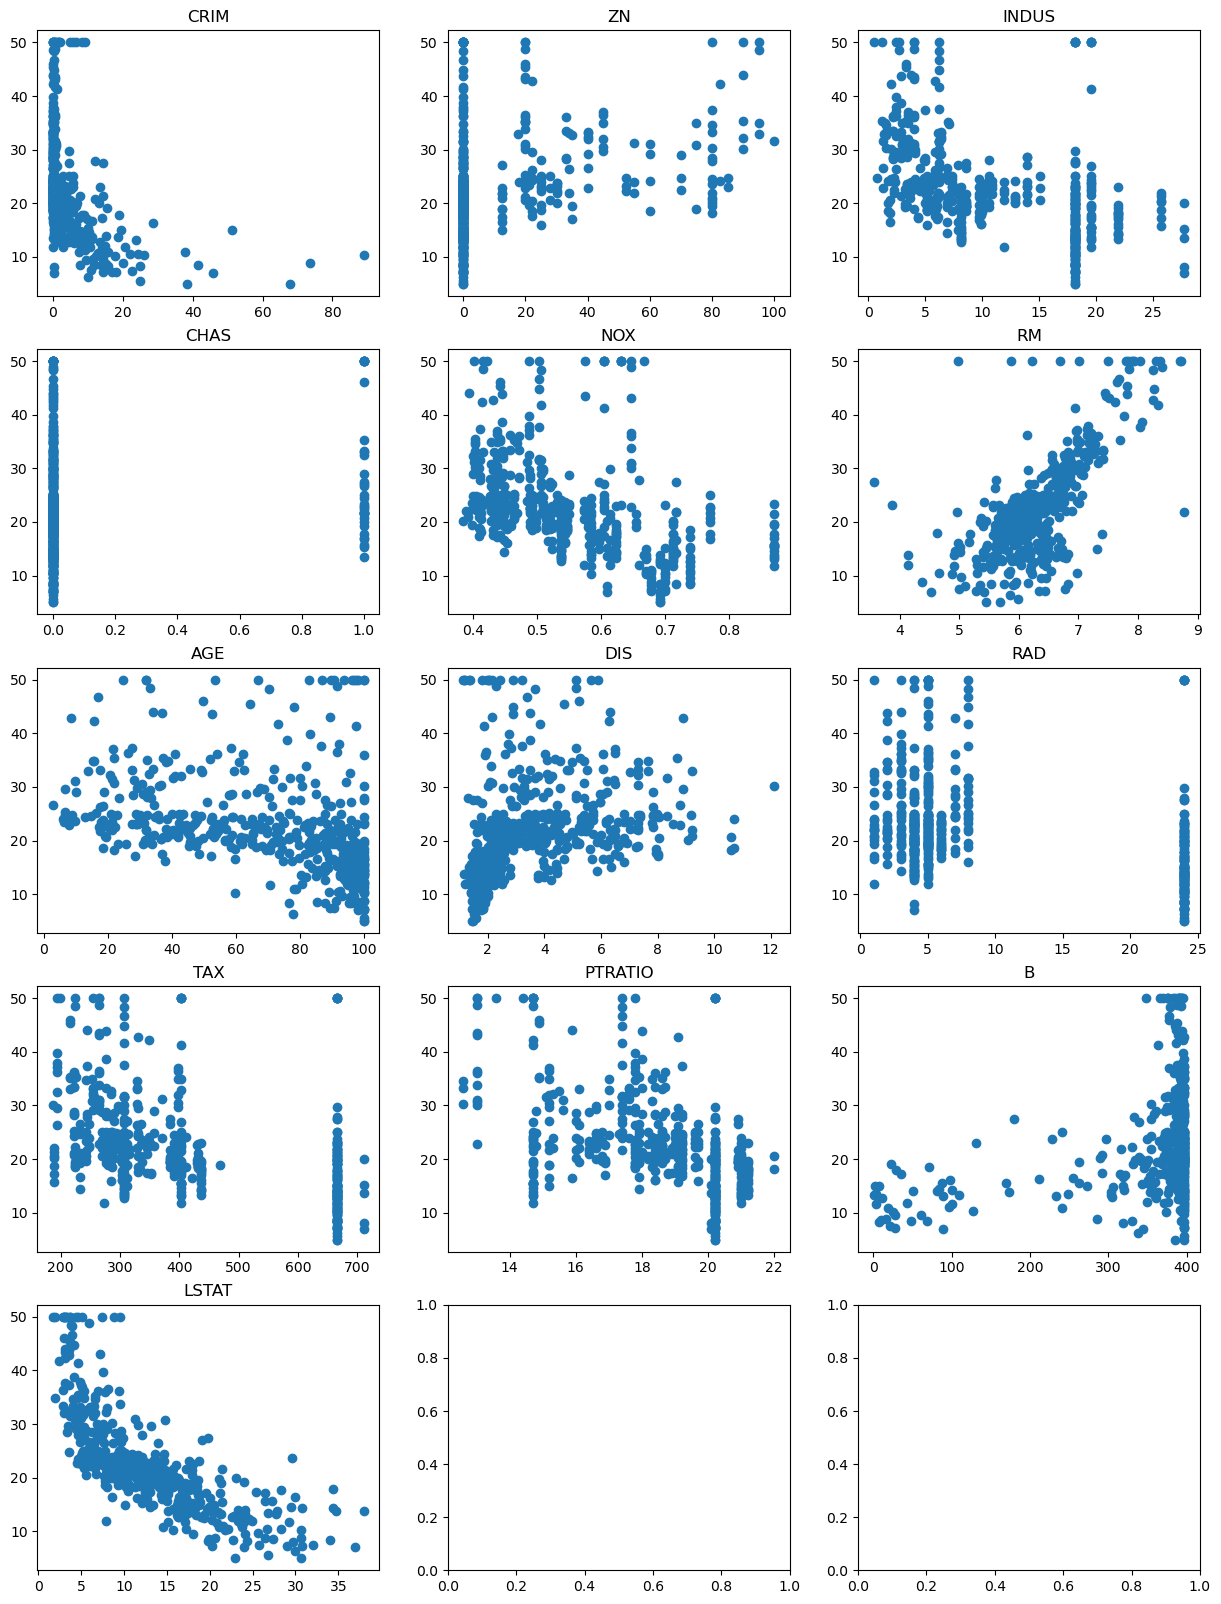

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
y = target

for i, ax in enumerate(axes.ravel()): #나누어진 각 subplot에 대해
    if i < data.shape[1]:
        x = data[:,i]

        ax.set_title(feature_names[i])
        ax.scatter(x, y)
plt.show()

In [3]:
print(feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Sklearn LinearRegression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br>coefficient: indepenent variables의 계수
<br>intercept: 상수 (bias)
<br>Sklearn이 제공하는 **LinearRegression**을 이용하여 회귀분석을 실시

### 3. 단순회귀분석(Simple linear regression)
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
<br>먼저 단순회귀분석, 즉 독립변수가 하나인 모형에 대해 실습한다.
<br>위에서 직관적으로 살펴본 그래프들 중에서 연관성이 높아보이는 RM부터 시작한다.

#### sklearn의 회귀분석 순서는 다음과 같다.

1. 원하는 클래스 import
2. 객체 생성
3. fit() 적용 : 모형 생성, 즉 데이터를 가장 잘 설명하는 선형식 - 쉽게 말해서 직선을 찾는다. fit()이 수행되면 기울기와 절편이 결정된다.
4. 모형 기본정보 확인 : fit()에서 결정된 기울기, 절편 등을 확인한다.
5. score()로 성능 검사 : R2(R square)라고 해서 모형의 설명력을 나타내는 수치를 계산한다. 
6. predict()로 예측 : 새로운 독립변수를 이용하여 종속변수를 예측한다.

In [4]:
# data에서 RM만 가져오려면?
print(data.shape)

(506, 13)


In [5]:
data[:, 5].shape

(506,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2) #test_size를 명시하지 않으면 0.25
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [7]:
#simple linear regression
from sklearn.linear_model import LinearRegression
# graph에서 RM이 정의 방향으로 유의한 영향을 끼치는 것으로 보이므로, RM을 독립변수로 선택

lr = LinearRegression()  #객체를 생성

lr.fit(X_train[:,5], Y_train) #기본적으로 LinearRegression은 다중회귀분석을 수행하므로 독립변수가 당연히 여럿일 것을 가정함
# X_train[:, 5]는 하나의 변수에 대한 값들로 이루어진 벡터이므로 에러가 발생
# 에러를 방지하기 위해서는 reshape을 이용해 하나의 변수라 하더라도 행렬 형태로 변환해줘야 함

print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음 

ValueError: Expected 2D array, got 1D array instead:
array=[5.885 5.891 6.129 5.604 6.417 7.014 6.431 6.939 6.167 6.376 5.896 6.565
 5.277 6.232 6.319 6.211 5.983 7.52  6.142 6.12  5.87  6.718 7.82  5.935
 5.868 5.976 7.82  5.856 7.007 5.531 5.963 5.613 5.79  5.874 7.274 4.88
 5.965 6.516 6.951 6.341 6.29  6.416 6.286 6.951 6.812 7.185 7.061 5.972
 6.545 8.069 6.041 5.713 6.417 6.595 6.051 6.358 6.739 6.552 6.406 5.786
 5.914 6.727 7.686 6.112 5.95  6.683 7.454 6.456 6.758 6.162 7.024 6.13
 7.203 5.759 6.63  7.645 6.153 5.362 5.933 5.731 5.713 6.826 6.655 5.599
 6.389 5.875 7.802 5.983 5.706 7.42  7.333 6.02  4.652 6.229 5.794 6.943
 6.072 6.176 6.874 6.163 6.251 6.458 5.304 6.471 4.628 6.25  5.851 6.108
 6.127 6.824 6.405 5.56  6.127 5.757 8.266 6.762 5.966 7.249 6.182 6.122
 6.525 6.393 5.889 5.852 5.952 5.961 5.304 5.399 5.837 5.628 6.383 5.88
 6.567 8.297 4.963 6.635 7.327 7.929 5.926 5.985 5.869 7.147 5.966 7.135
 6.625 7.104 4.906 6.195 6.209 6.433 5.803 6.254 6.604 6.86  6.216 6.167
 6.185 6.98  6.066 5.155 4.368 6.326 5.741 6.172 6.728 7.923 6.333 6.619
 6.014 5.39  6.377 6.315 6.137 4.903 7.185 5.888 6.459 7.765 4.926 6.998
 6.335 5.879 6.382 7.041 6.453 3.863 6.485 6.185 7.489 6.781 5.272 6.027
 4.138 6.059 5.572 8.78  6.229 5.412 8.725 5.854 6.343 6.174 8.337 5.986
 5.762 6.193 6.019 5.924 5.926 5.854 5.813 5.836 5.813 5.968 6.115 6.398
 5.942 6.301 5.757 6.649 6.108 6.794 7.875 6.208 7.079 6.086 6.417 5.597
 6.487 6.871 6.631 5.841 5.887 5.822 5.818 8.704 6.431 8.04  6.114 6.081
 5.683 6.164 5.52  6.219 6.968 6.678 6.852 6.474 6.404 6.145 6.546 6.223
 5.705 6.54  6.006 7.61  6.38  6.03  7.393 6.101 6.14  6.273 7.358 6.402
 5.951 6.152 7.47  6.842 6.461 6.437 5.872 5.682 6.575 5.935 7.691 6.495
 5.608 4.519 5.593 6.312 5.403 5.949 7.853 6.069 6.23  5.895 5.807 6.426
 6.782 6.77  6.879 5.981 6.031 5.92  5.905 7.206 6.833 5.708 5.85  5.859
 6.794 6.556 5.961 5.536 6.726 6.51  6.209 5.888 6.009 6.096 6.229 5.747
 4.973 5.404 6.411 6.095 6.861 7.313 6.152 6.482 6.372 7.163 6.434 6.249
 6.297 6.816 7.016 5.468 5.834 5.987 5.349 6.982 6.484 6.593 6.047 7.287
 6.49  7.831 8.375 6.003 6.279 6.405 6.98  5.404 6.436 6.8   8.247 6.782
 6.348 6.015 6.317 5.602 6.064 5.594 6.454 4.138 6.144 6.715 6.023 5.627
 5.012 6.065 5.787 6.315 6.021 6.24  5.701 6.421 6.549 7.241 6.03  5.877
 7.267 5.878 5.875 5.871 6.345 6.579 5.957 5.036 6.211 5.414 6.728 5.186
 6.442 5.605 6.405 6.113 6.968 7.178 6.438 5.093 6.127 5.913 7.416 6.897
 6.312 6.375 5.856 7.236 6.63  5.96  6.092 6.854].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### numpy의 reshape에 대해 이해

위 에러메시지를 보면 reshape(-1, 1)을 사용할 것을 권유하고 있으므로 이에 대해 알아보고자 한다.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

사용법: numpy.reshape(a, newshape, order='C')
<br>영어설명: Gives a new shape to an array without changing its data.
<br> 데이터는 변화시키지 않으면서 ndarray의 shape - 차원과 각 차원의 크기 - 을 변화시키는 함수

In [8]:
import numpy as np
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a.shape)
a

(3, 2)


array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
a.reshape((2, 3))
#np.reshape(a, (2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
a.reshape((-1, 3)) # -1이면 다른 차원을 적용하고 나서 결정되는 값으로 자동 적용

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
a.reshape((-1, 1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [12]:
lr.fit(X_train[:,5].reshape(-1, 1), Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# LinearRegression은 다중회귀분석 즉 독립변수가 여러개인 모형을 기본으로 하고 있기 때문
print(lr) # 모형정보를 확인, 사용된 parameter를 알 수 있음 

LinearRegression()


In [13]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #계수 - 즉 기울기
print('intercept_', lr.intercept_) #상수

coef_ [9.6191235]
intercept_ -37.93933246547816


In [14]:
#모형의 성능 보기
print('R2 score for train set', lr.score(X_train[:,5].reshape(-1, 1), Y_train)) #train set에 대한 적합도 - 모형이 얼마나 잘 맞나

R2 score for train set 0.5230008679735505


In [15]:
# test set에 대한 예측
P_test = lr.predict(X_test[:,5].reshape(-1, 1)) #predict 함수를 이용
print('prediction', P_test)
print('R2 score for test set', lr.score(X_test[:,5].reshape(-1, 1), Y_test)) #test set에 대한 적합도

prediction [16.09128423 29.16367307 30.2410149  20.76617825 16.60109778 15.6295663
 21.71847148 18.58263722 22.81505156 23.57496231 13.9077432  29.15405394
  9.86771133 22.10323642 18.39987387 23.3633416  16.53376391 25.82583721
 21.81466271 19.6792173  26.5184141  26.25869777 19.89083801 19.15978463
 26.98013203 22.91124279 23.91163163 16.97624359 23.76734478 25.88355195
 15.59108981 14.26365077 19.15978463 21.63189937 16.82233762 22.33409538
 24.71001889 21.22789618 25.95088582 16.2836667  23.86353602 21.38180215
 22.68038383 30.88549617 24.95049697 28.98090972 33.35761091 15.63918543
 20.57379578 17.01472009 24.53687466 16.95700535 -3.68563368 18.79425793
 22.13209379 19.08283164 25.60459737 26.76851131 24.40220693 17.67843961
 17.68805873 13.46526351 21.16056231 19.75617028 25.72002685 26.98975115
 23.43067546 19.81388502 10.33904838 30.81816231 10.15628503 26.47031849
 21.94933044 41.50500852 20.69884439 25.70078861 25.19097506 14.5233671
 14.51374798 17.14938781 21.33370654 20.13

위 결과를 보면 train set과 test set에 대한 R2 값이 서로 많이 다른 것을 볼 수 있다.
<br>이는 일반화 성능이 많이 부족하거나, test set이 매우 운이 없게 만들어졌다는 것을 의미한다.

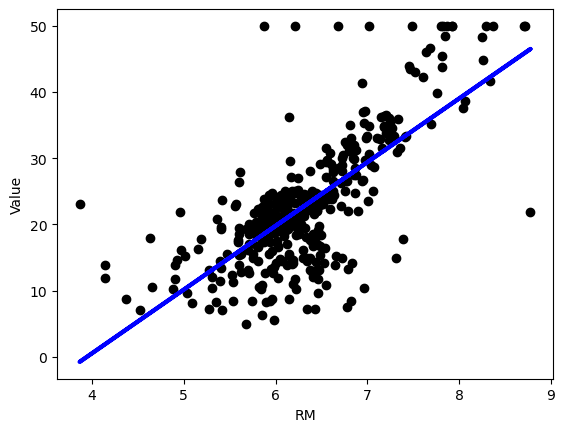

In [16]:
# train set에 대한 graph
Y_predict = lr.predict(X_train[:,5].reshape(-1, 1))
plt.xlabel(feature_names[5])
plt.ylabel('Value')
plt.scatter(X_train[:,5], Y_train, color='black') #검은 점은 실제 값
plt.plot(X_train[:,5], Y_predict, color='blue', linewidth=3) #예측된 값은 직선이 됨
plt.show()

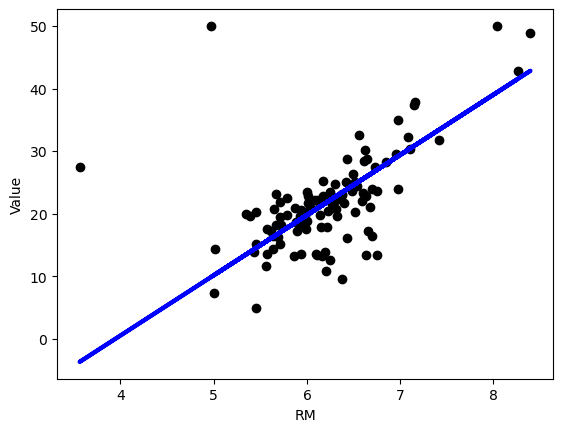

In [17]:
# test set에 대한 graph
Y_predict = lr.predict(X_test[:,5].reshape(-1, 1))
plt.xlabel(feature_names[5])
plt.ylabel('Value')
plt.scatter(X_test[:,5], Y_test, color='black')
plt.plot(X_test[:,5], Y_predict, color='blue', linewidth=3)
plt.show()

In [18]:
#simple linear regression 예제 하나 더
from sklearn.linear_model import LinearRegression

# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(X_train[:,-1].reshape(-1, 1), Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

print(lr) #사용된 parameter를 알 수 있음 

LinearRegression()


In [19]:
#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train[:,-1].reshape(-1, 1), Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test[:,-1].reshape(-1, 1), Y_test)))

coef_ [-0.97860602]
intercept_ 35.127665124123034
R2 score for train set: 0.553
R2 score for test set: 0.481


R2 score를 보면 RM에 비해 LSTAT이 설명력이 더 높은 것을 알 수 있다.

### 4. 다중회귀분석(Multiple linear regression)
독립변수가 여러 개인 회귀모형<br>
보스톤 데이터 셋에서 전체 feature를 전부 사용

In [20]:
#multiple linear regression 예제
lr = LinearRegression().fit(X_train, Y_train)
print(lr) #사용된 parameter를 알 수 있음 

LinearRegression()


In [21]:
print('coef_', lr.coef_) #사용된 모든 독립변수에 대한 계수(기울기)를 반환
print('intercept_', lr.intercept_)

coef_ [-1.00809890e-01  3.61695658e-02  4.64632392e-02  2.86047817e+00
 -2.02948455e+01  4.35842642e+00 -3.58711959e-03 -1.49173326e+00
  3.42225715e-01 -1.41917665e-02 -1.04761533e+00  7.51214717e-03
 -4.84605746e-01]
intercept_ 36.767081875846664


예측결과와 실제값과의 관계를 그래프로 확인<br>
독립변수가 여러개이기 때문에 독립변수-종속변수 관계로 그래프를 그리기 어려움.<br>
따라서 실제 값을 X축에 놓고 예측된 값을 Y축으로 해서 그래프를 그리고 적합도를 직관적으로 봄

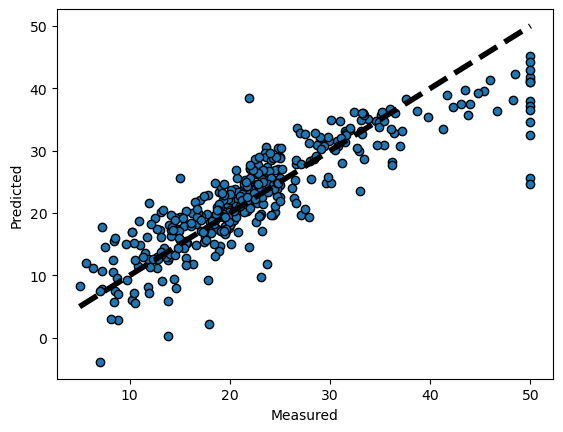

In [22]:
predicted = lr.predict(X_train) #먼저 값을 예측

fig, ax = plt.subplots()
ax.scatter(Y_train, predicted, edgecolors=(0, 0, 0)) #실제값과 예측값으로 점을 찍어 표시 - 둘이 다를 수 있음
ax.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4) #실제값과 예측값이 같은 지점을 연결해서 선을 표시
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
print('R2 score for train set: {:.3f}'.format(lr.score(X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(lr.score(X_test, Y_test)))

R2 score for train set: 0.754
R2 score for test set: 0.644


R2 score를 보면 단순회귀분석에 비해 적합도(정확하게는 설명력)가 높아진 것을 볼 수 있다.

### 5. 특성 스케일링(feature scaling) - 데이터 변환 혹은 표준화
어떤 머신러닝 알고리즘은 독립변수들의 스케일이 많이 다르면 잘 작동하지 않음<br>
따라서 일정한 범위로 변수들을 조정할 필요가 있음<br>
**StandardScaler**는 변수의 값들을 표준화시켜주는데, 표준화는 평균으로 빼고 표준편차로 나누는 것을 의미<br>
다른 스케일링 방식으로 min-max scaling이 있는데, 이는 최소값을 뺀 후, 최대값과 최소값의 차이로 나누어줌<br>
그 결과, 값을 0과 1 사이로 변환하는데, min-max에 비해 standardize는 이상치에 더 강하다는 장점이 있음

In [24]:
#multiple linear regression Standardize 예제
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))
print('scaler mean:', scaler.mean_)
print('scaler variance:', scaler.var_)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

StandardScaler()
scaler mean: [3.79039431e+00 1.11398515e+01 1.11918317e+01 7.67326733e-02
 5.57256436e-01 6.30450248e+00 6.90284653e+01 3.71624282e+00
 9.56188119e+00 4.08928218e+02 1.83346535e+01 3.58188936e+02
 1.26948020e+01]
scaler variance: [8.23387485e+01 5.28097397e+02 4.74641580e+01 7.08447701e-02
 1.40565691e-02 5.05966314e-01 7.75091343e+02 4.18428118e+00
 7.61768638e+01 2.84274280e+04 4.83127438e+00 7.74000187e+03
 5.17353715e+01]


In [25]:
slr = LinearRegression()
slr.fit(scaled_X_train, Y_train)
print('coef_', slr.coef_)
print('intercept_', slr.intercept_)

coef_ [-0.91475601  0.83119     0.32010494  0.76136435 -2.40616506  3.10020577
 -0.09986707 -3.0514173   2.98692408 -2.39279361 -2.30267527  0.66089828
 -3.48563851]
intercept_ 22.70445544554458


In [26]:
print('R2 score for train set: {:.3f}'.format(slr.score(scaled_X_train, Y_train)))
print('R2 score for test set: {:.3f}'.format(slr.score(scaled_X_test, Y_test)))

R2 score for train set: 0.754
R2 score for test set: 0.644


변환된 값을 이용하여 수행한 회귀분석에 대해 설명력을 출력<br>
결과를 보면 변환전과 차이가 없음. 즉, 보스톤 데이터 셋을 이용한 회귀분석에서는 변환이 별 영향을 미치지 않음을 알 수 있음

### 6. 다항식(polynomial) features 변환
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
<br>Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].<br>
선형회귀분석은 기본적으로 직선으로 연관성을 찾으려는 시도라고 볼 수 있는데, 주어진 독립변수들에 대해 제곱이나 변수들 간의 곱 - 다항식을 독립변수로 추가하면 다양한 곡선으로 적합이 가능하다.
<br>http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

### 곡선으로 피팅하기
그래프를 살펴봤을 때 어떤 독립변수들은 곡선으로 피팅을 했을 때 더 피팅이 될 것 같은 것들이 있다.
<br> 위에서 살펴본 그래프들 중에서 LSTAT을 살펴보자. 

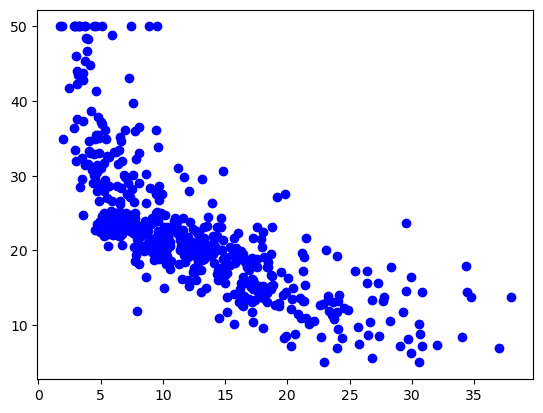

In [27]:
plt.plot(data[:, -1], target, 'bo')
plt.show()

위 그래프를 보면 직선보다 곡선이 두 변수 간의 관계를 더 잘 설명할 수 있을 것 같은 직관이 생긴다.
<br> 이를 확인하기 위해 먼저 위에서 수행했지만 다시 한번 단순회귀분석을 실시하고 결과를 본다.

In [28]:
# graph에서 LSTAT이 역방향으로 유의한 영향을 끼치는 것으로 보이므로, LSTAT을 독립변수로 선택
lr = LinearRegression().fit(X_train[:,-1].reshape(-1, 1), Y_train) #dependent variable이 한 개인 경우에는 reshape를 해줘야 함
# 위 예는 객체생성과 fit을 한번에 수행

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train[:,-1].reshape(-1, 1), Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test[:,-1].reshape(-1, 1), Y_test)))

coef_ [-0.97860602]
intercept_ 35.127665124123034
R2 score for train set: 0.553
R2 score for test set: 0.481


그래프를 봤을 때 2차함수가 적당한 것으로 판단되므로 2차함수를 만들어서 다중회귀분석을 수행해본다.
<br>의 전형적인 식은 아래와 같다.
$$y = ax^2+bx+c$$
<br> 위 식과 다중회귀분석의 식을 잘 비교하면, x의 제곱을 새로운 독립변수로 만들어서 x와 x제곱 두 개를 독립변수로 갖는 다중회귀분석을 실시하면 되는 것을 알 수 있다.

In [29]:
#x제곱을 계산
X2 = X_train[:, -1]**2
X2.shape

(404,)

In [30]:
#x와 x제곱을 묶어서 train set으로 만들기 위해 vstack을 사용
X_train_new = np.vstack((X_train[:, -1], X2))
X_train_new.shape

(2, 404)

#### Numpy vstack의 이해
https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
<br> Stack arrays in sequence vertically (row wise).

In [31]:
#전치를 해서 새로운 데이터 셋을 생성
X_train_new = X_train_new.T
X_test_new = np.vstack((X_test[:, -1], X_test[:, -1]**2)).T

lr = LinearRegression().fit(X_train_new, Y_train) 

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train_new, Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test_new, Y_test)))

coef_ [-2.38241837  0.04416926]
intercept_ 43.54544185153473
R2 score for train set: 0.651
R2 score for test set: 0.574


설명력이 확실히 증가한 것을 볼 수 있다.
<br>이것을 눈으로 확인하기 위해 그래프를 그려본다.

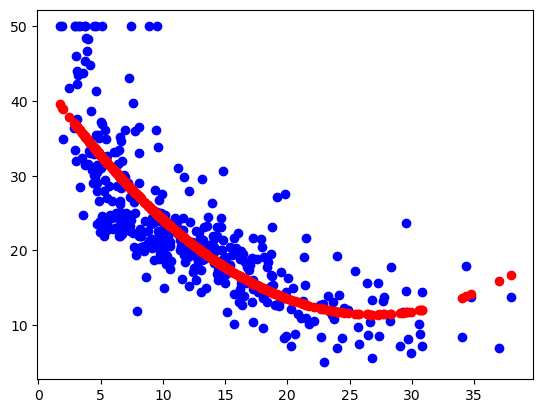

In [32]:
plt.plot(X_train[:, -1], Y_train, 'bo')
plt.plot(X_train[:, -1], lr.predict(X_train_new), 'ro')
plt.show()

#### PolynomialFeatures
sklearn의 PolynomialFeatures를 사용하면 이와 같은 과정을 보다 쉽게 하는 것이 가능하다.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #2차항까지 생성

X_train_poly = poly.fit_transform(X_train[:, [-1]])
X_test_poly = poly.transform(X_test[:, [-1]])

print(X_train_poly.shape, X_test_poly.shape)

(404, 3) (102, 3)


In [34]:
X_train[:5, [-1]]

array([[ 8.79],
       [10.87],
       [15.12],
       [13.98],
       [19.31]])

In [35]:
X_train_poly[:5]

array([[  1.    ,   8.79  ,  77.2641],
       [  1.    ,  10.87  , 118.1569],
       [  1.    ,  15.12  , 228.6144],
       [  1.    ,  13.98  , 195.4404],
       [  1.    ,  19.31  , 372.8761]])

In [36]:
lr = LinearRegression().fit(X_train_poly, Y_train) 

#모형 기본 정보 보기
print('coef_', lr.coef_) #기울기, 그래프를 생각하면 음수가 나와야 함
print('intercept_', lr.intercept_)
print('R2 score for train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
# test set에 대한 예측
print('R2 score for test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

coef_ [ 0.         -2.38241837  0.04416926]
intercept_ 43.54544185153482
R2 score for train set: 0.651
R2 score for test set: 0.574


PolynomialFeatures는 모든 독립변수에 적용하는 것이 가능하다.
<br>이 경우, 각 독립변수의 제곱 뿐만 아니라 독립변수 간의 곱도 포함된다.
<br>이 때 독립변수 간의 곱은 interaction이라고 하며, 두 독립변수의 교호작용(상호작용)을 본다는 의미를 갖는다.

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #2차항까지 생성
#poly = PolynomialFeatures(degree=2, interaction_only=True) #같은 항의 제곱을 제외하고 다른 항끼리의 곱만으로 생성 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('X_train vs X_train_poly: ', X_train.shape, X_train_poly.shape)

X_train vs X_train_poly:  (404, 13) (404, 105)


In [38]:
lr = LinearRegression().fit(X_train_poly, Y_train)
print('R2 score for polynomial train set: {:.3f}'.format(lr.score(X_train_poly, Y_train)))
print('R2 score for polynomial test set: {:.3f}'.format(lr.score(X_test_poly, Y_test)))

R2 score for polynomial train set: 0.935
R2 score for polynomial test set: 0.840


변환된 다항식을 이용하여 회귀분석을 수행한다<br>
다항식을 적용하지 않은 다중회귀분석 결과와 비교할 때, train set과 test set 모두 설명력이 향상되는 것을 볼 수 있다.<br>
그러나 LSTAT 하나에 대해서만 다항식을 적용한 결과와 비교하면 test set에 대한 설명력은 오히려 떨어졌다.
이 결과만 볼 때, train set와 test set의 설명력 차이가 커서 과대적합이 의심되는 상황이며, LSTAT 결과와 비교해도 과대적합이 의심된다.

### 과대적합(Overfitting)과 과소적합(Underfitting)
Overfitting(과대적합): train set에 대해 너무 과하게 학습되어 test set에 대한 예측력이 떨어지는 경우
<br>Underfitting(과소적합): 학습이 부족해서 train set의 구조를 잘 반영하지 못한 경우
![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png)

### 7. 릿지회귀(Ridge regression)
https://brilliant.org/wiki/ridge-regression/
Tikhonov Regularization, colloquially known as **ridge regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data.

https://en.wikipedia.org/wiki/Tikhonov_regularization
the most commonly used method of **regularization** of ill-posed problems. In statistics, the method is known as **ridge regression**, in machine learning it is known as **weight decay**, and with multiple independent discoveries.
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

릿지회귀는 과대적합을 방지하기 위한 방법으로, 각 독립변수에 대한 계수가 과도하게 커지는 것을 방지<br>
**LinearRegression**과 동일한 방법으로 사용함
![](https://ds055uzetaobb.cloudfront.net/image_optimizer/37ea8b78480bb520a3e30b7113689f7b77cecc2d.png)

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_poly, Y_train)
#ridge = Ridge(alpha=10).fit(X_train_poly, Y_train)
print('Ridge R2 score for polynomial train set: {:.3f}'.format(ridge.score(X_train_poly, Y_train)))
print('Ridge R2 score for polynomial test se`t: {:.3f}'.format(ridge.score(X_test_poly, Y_test)))

Ridge R2 score for polynomial train set: 0.930
Ridge R2 score for polynomial test se`t: 0.838


위 결과를 보면 사용한 후에 test set에서의 설명력이 월등히 좋아진 것을 볼 수 있다.

### 8. 라쏘회귀(Lasso regression)
https://en.wikipedia.org/wiki/Lasso_(statistics)
In statistics and machine learning, **lasso** (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both **variable selection** and **regularization** in order to enhance the prediction accuracy and **interpretability** of the statistical model it produces. 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

라쏘회귀는 릿지회귀와 비슷하나, 계수가 0에 가까우면 0으로 만드는 성향이 있다. <br>
즉, 특정 독립변수는 종속변수에 전혀 영향을 미치지 못하게 되며 모형에서 제외된다.

In [40]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso.coef_ != 0))) #계수가 0이 아닌 독립변수의 수를 출력

Lasso R2 score for polynomial train set: 0.883
Lasso R2 score for polynomial test set: 0.838
Used features count: 56


/Users/sangunpark/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.458e+03, tolerance: 3.616e+00
  model = cd_fast.enet_coordinate_descent(


위 결과를 보면 다항식 변환을 한 후에 변수가 총 105개였으나 라쏘회귀에서는 56개만 사용된 것을 볼 수 있다.<br>
설명력은 train set에 대해서는 릿지회귀보다는 떨어지지만 사용되지 않은 것에 비해서는 높다.
<br>test set에 대해서는 오히려 릿지회귀보다 뛰어나다. 그러나 일반적으로는 라쏘회귀의 성능이 릿지회귀보다 떨어지는 경우가 더 많다. 이는 릿지회귀에 비해 더 적은 수의 변수로 설명을 하기 때문으로 이해할 수 있다. 다만 이 예에서는 테스트 셋이 라쏘회귀에 더 적합했다고 해석할 수 있다.

경고를 보면 모형이 수렴하지 못했다는 것을 알 수 있으며, 이를 해결하기 위한 방법으로 iteration 수의 증가를 제안하고 있다.
iteration의 증가 외에 수렴여부의 조건(tol) 자체를 조정할 수 있다.

In [41]:
lasso01 = Lasso(max_iter=1000000).fit(X_train_poly, Y_train)
print('Lasso R2 score for polynomial train set: {:.3f}'.format(lasso01.score(X_train_poly, Y_train)))
print('Lasso R2 score for polynomial test set: {:.3f}'.format(lasso01.score(X_test_poly, Y_test)))
print('Used features count: {}'.format(np.sum(lasso01.coef_ != 0)))

Lasso R2 score for polynomial train set: 0.885
Lasso R2 score for polynomial test set: 0.850
Used features count: 53


max_iter의 조정을 통해 더 나은 결과를 보이고 있다.